- https://www.youtube.com/watch?v=KHVR587oW8I

In [17]:
from IPython.display import Image

- Probabilistic interpretation
- likelihood & uncertainlity
- learning a probability distribution from data
    - then inference
    - or synthesis
- 频率 vs. Bayesian：关于 probability 的不同观点；
    - 频率：硬币、骰子，repeats
        - 无法解释天气预报的概率，比如明天天气下雨的概率是70%；
            - 因为我们无法 repeat the measurement of tomorrow's weather to find the frequency of rain outcomes;
            - $P(rain)=\frac{P(rain)}{P(rain)+P(sunny)}$
    - Bayesian：Probability is viewed as the as a **subjective degree of belief** or confidence；
        - 明天下雨的概率是 0.7：a measurement of confidence rather that a frequency
- high-dimensional probability distribution
    - all images come from a high-dimensional probability distribution
- generation
    - Sampling from the **joint distribution** of pixels allows for generative capabilities
        - because this distribution captures **the structure of data**；
        - 相对地，sampling each pixels **independently** always results in noise；

### surprise => Entropy

- $h(s)$：surprisal of state $s$
- $h(s)=f(p_s)$：function of probability
    - $h(1/6)\gt h(1/2)$：骰子为1的惊讶度 > 硬币正面的惊讶度
    - rare events => high surprise
    - common events => low surprise
    - $p_s\rightarrow 1, h(p_s)\rightarrow 0$
- when probabilities multiply（概率连乘）, the surprise should add
    - $h(p_1\cdot p_2)=h(p_1)+h(p_2)$ （log function）
    - 同时 $p_s$ 越大，$h(p_s)$ 越低
- $h(s)=\log \frac1{p_s}$
- average surprise of a distribution => Entropy
    - $\sum_sp(s)\log\frac1{p_s}=-\sum_sp_s\log p_s$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the surprise function h(s)
def h(p_s):
    return np.log(1 / p_s)

# Generate probability values
p_s_values = np.linspace(0.01, 1, 1000)  # Avoid zero to prevent log(0)
h_values = h(p_s_values)

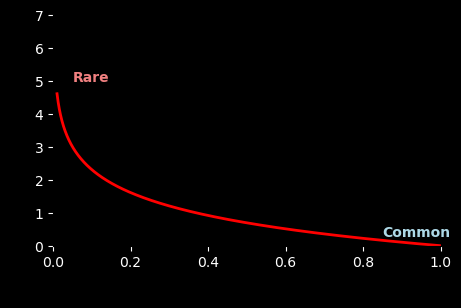

In [6]:
# Plotting
plt.figure(figsize=(5, 3))
plt.plot(p_s_values, h_values, color='red', linewidth=2)

# Adding text and labels
plt.text(0.05, 5, 'Rare', color='lightcoral', fontsize=10, weight='bold')
plt.text(0.85, 0.3, 'Common', color='lightblue', fontsize=10, weight='bold')
plt.text(0.4, 4, r'$h(s) = \log \frac{1}{p_s}$', fontsize=30)

# Label axes
plt.xlabel('Probability $p_s$', fontsize=14)
plt.ylabel('Surprise', fontsize=14)

# Set limits and style
plt.xlim(0, 1)
plt.ylim(0, 7)
plt.grid(visible=False)
plt.gca().set_facecolor('black')
plt.gca().tick_params(colors='white')
plt.gcf().set_facecolor('black')

# Show the plot
plt.show()

### $p_{model}$ vs. $p_{reality}$ 

- 考虑一个非常（现实中） rigged coin，$0.99$ vs. $0.01$
    - 抛十次，均为正面；
    - 对于 $p_{model}$，其 surprise 为
        - $p(10\text{ heads})=0.5^{10}$
        - $h(10\text{ heads})=\log\frac{1}{0.5^{10}}$
    - 对于 $p_{reality}$，其 surprise
        - $p(10\text{ heads})=0.99^{10}$
        - $p(10\text{ heads})=\log\frac1{0.99^{10}}$
- your surprise is caused by believing in the wrong model

In [13]:
np.log(0.5**-10), np.log(0.99**(-10))

(6.931471805599453, 0.10050335853501455)

### cross entropy => KL div

$$
H(P,Q)=\sum_sp(s)\log\frac1{q_s}
$$

- Average surprise you will get by observing a random variable governed by distribution $P$, while believing in its model $Q$.
- $p_s$: how often the state s is observed
- $\log\frac1{q_s}$: how surprised you will be to see it

$$
H(P,Q)\geq H(P)
$$

- $P=Q$ 时，$H(P,Q)=H(P)$

$$
H(P,Q)\neq H(Q,P)
$$

- 考虑之前的例子，实际是 0.99 vs. 0.01，认为是 0.5 vs. 00.5
    - Actual $p_{heads}$ 0.99
    - Believed $p_{heads}$ 0.5
    - Actual $p_{tails}$ 0.01
    - Believed $p_{tails}$ 0.5

In [14]:
0.99 * np.log(1/0.5) + 0.01 * np.log(1/0.5)

0.6931471805599453

In [15]:
0.5 * np.log(1/0.99) + 0.5 * np.log(1/0.01)

2.307610260920796

#### kl div

$$
H(P,Q)-H(P)=\sum_s p_s\log\frac{p_s}{q_s}
$$

Measures surprise caused by the model and true distributions being different, beyond the uncertainty of the true distribution itself.
- 排除掉原始分布本身的不确定性；

In [16]:
0.99 * np.log(1/0.5) + 0.01 * np.log(1/0.5) - (0.99 * np.log(1/0.99) + 0.01 * np.log(1/0.01))

0.6371456462050978

### deep learning

- target distribution (is unknown, $P$) vs. model's approximation ($Q$)
- objective

$$
\min_Q D_{KL}(P_{data},P_{model})=H(P,Q)-H(P)
$$

- 对 $Q$ 进行优化时，$H(P)$ is constant (entropy of training data)

In [18]:
Image(url='./imgs/cross-entropy-loss.png', width=400)